In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('data.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Data Card

- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm


In [3]:
print(data.describe(include='all'))

                  N            P            K  temperature     humidity  \
count   2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      50.551818    53.362727    48.149091    25.616244    71.481779   
std       36.917334    32.985883    50.647931     5.063749    22.263812   
min        0.000000     5.000000     5.000000     8.825675    14.258040   
25%       21.000000    28.000000    20.000000    22.769375    60.261953   
50%       37.000000    51.000000    32.000000    25.598693    80.473146   
75%       84.250000    68.000000    49.000000    28.561654    89.948771   
max      140.000000   145.000000   205.000000    43.675493    99.981876   

                 ph     rainfall label  
count   2200.000000  2200.000000  2200  
unique          N

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
def plot_conti(x, name=""):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title(f'Histogram: {name}')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title(f'Checking Outliers for {name}')
    sns.boxplot(x,ax=axes[1])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title(f'{name}\'sRelation with output variable')
    sns.countplot(x = x,hue = data.label, ax=axes[1])

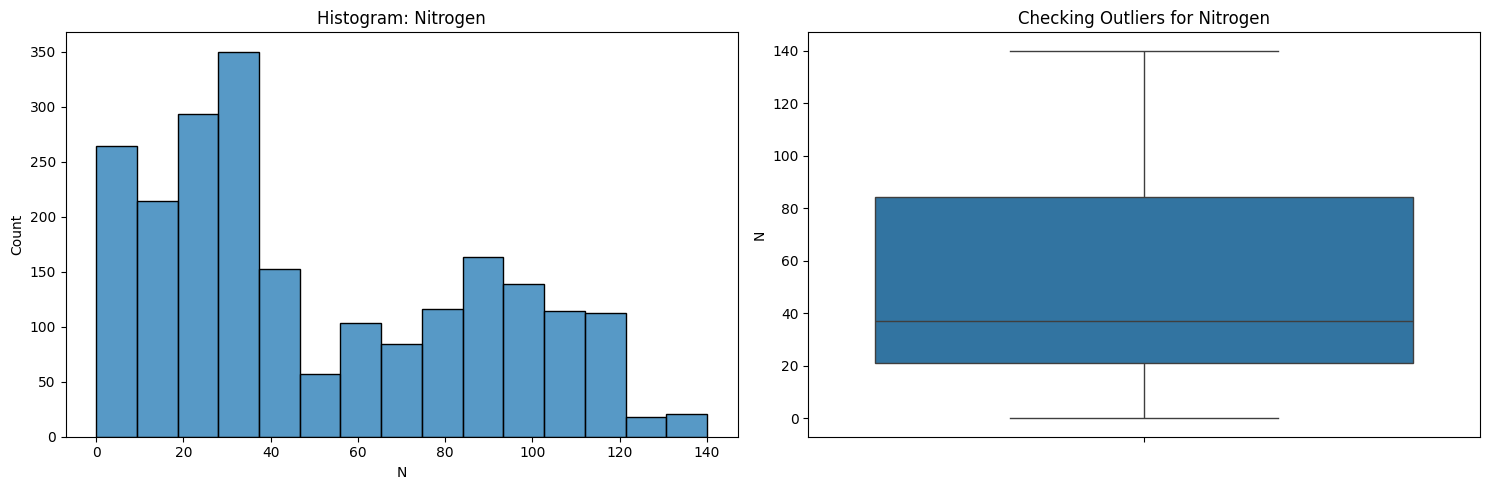

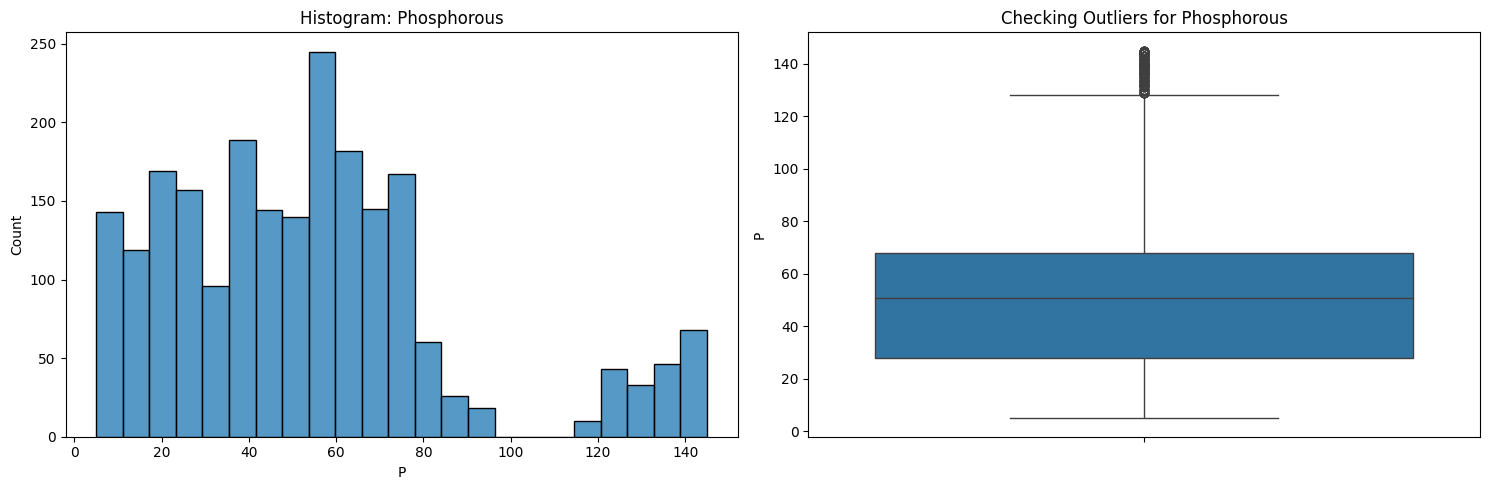

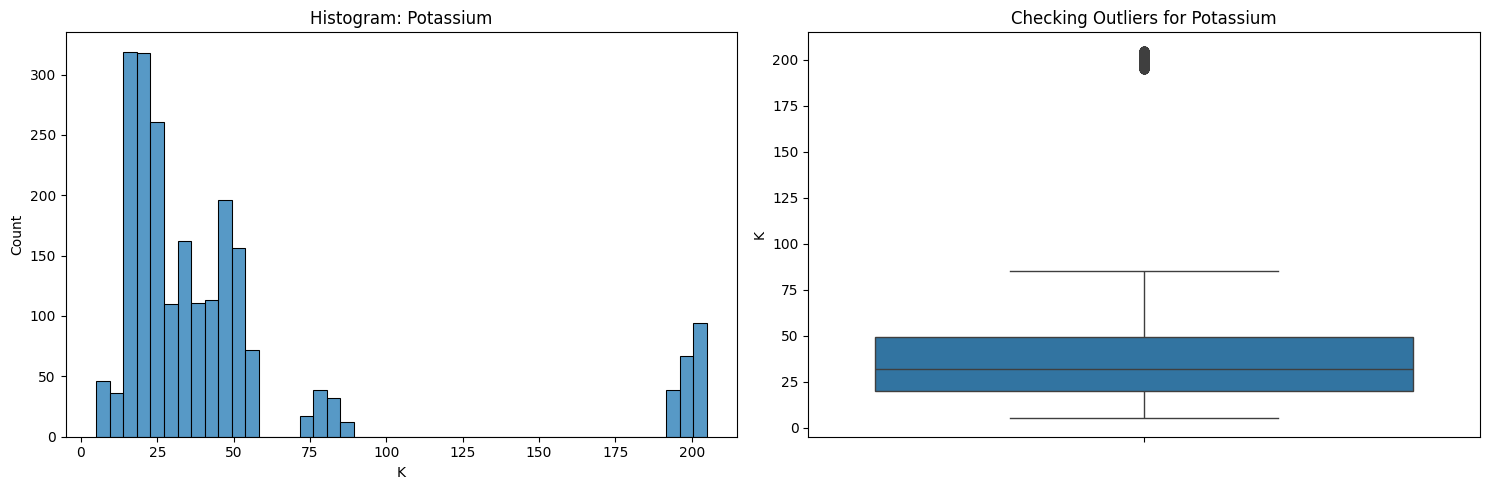

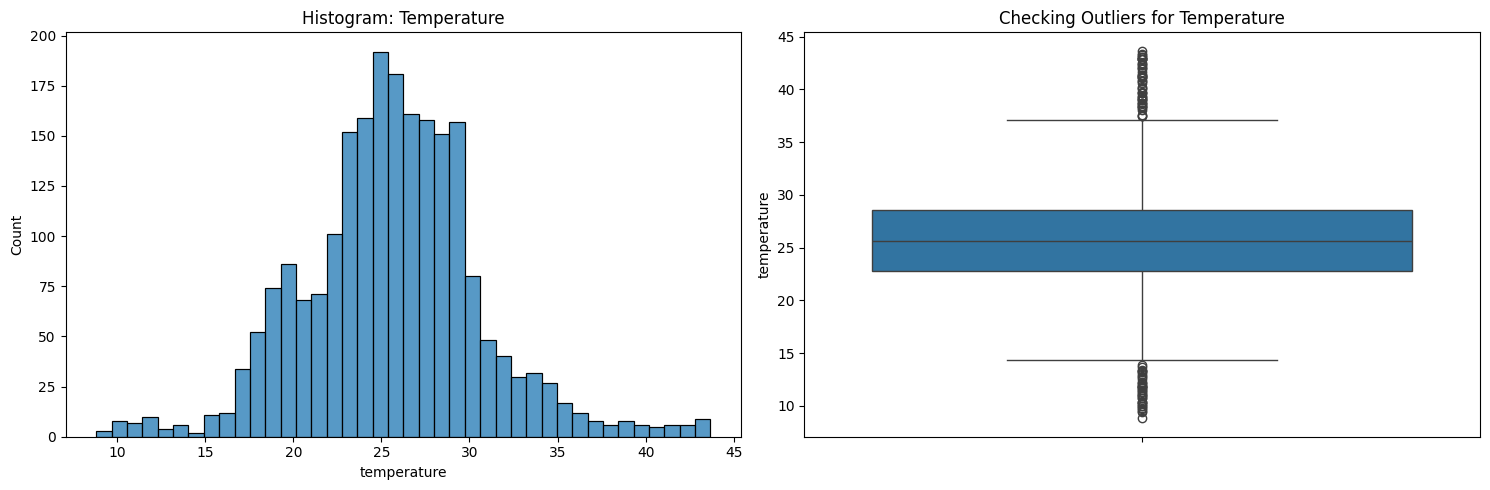

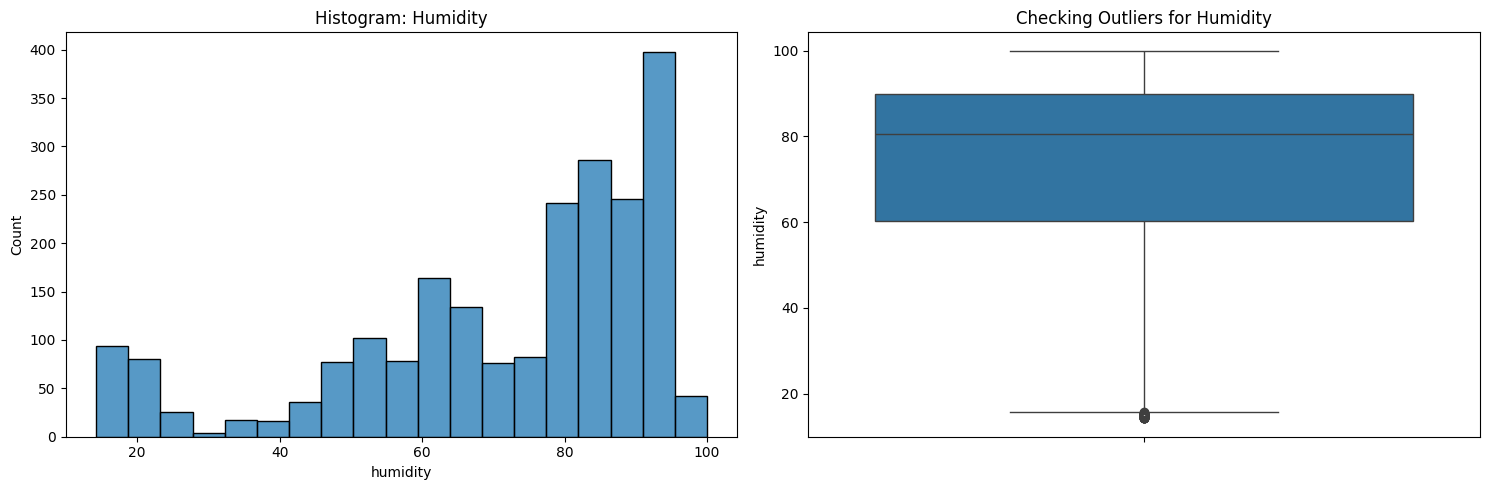

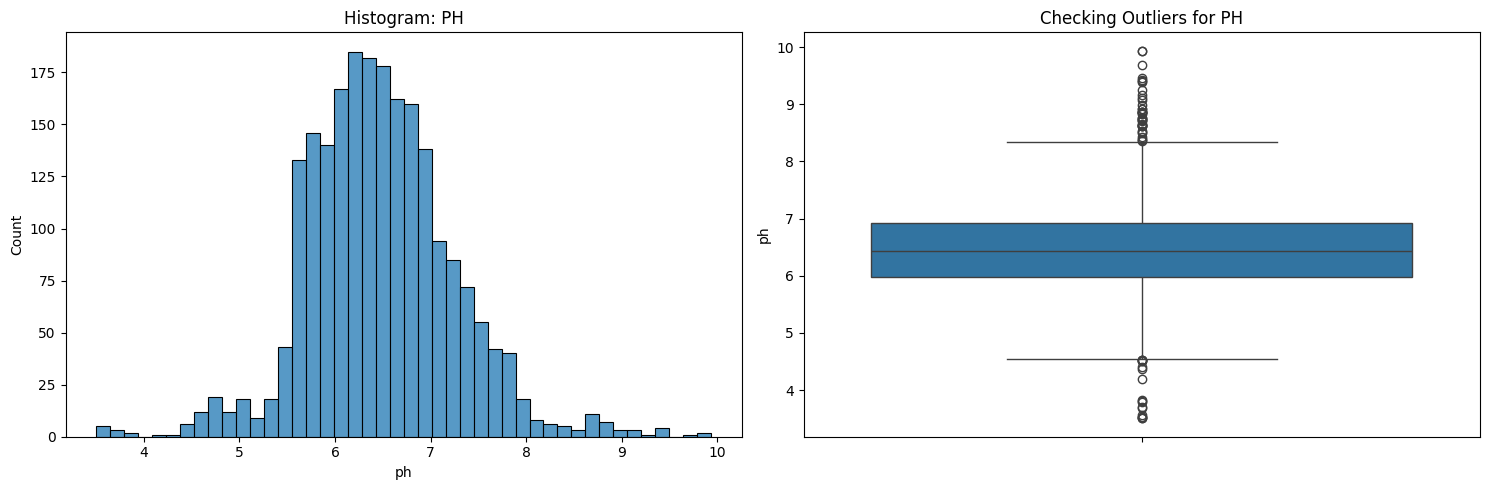

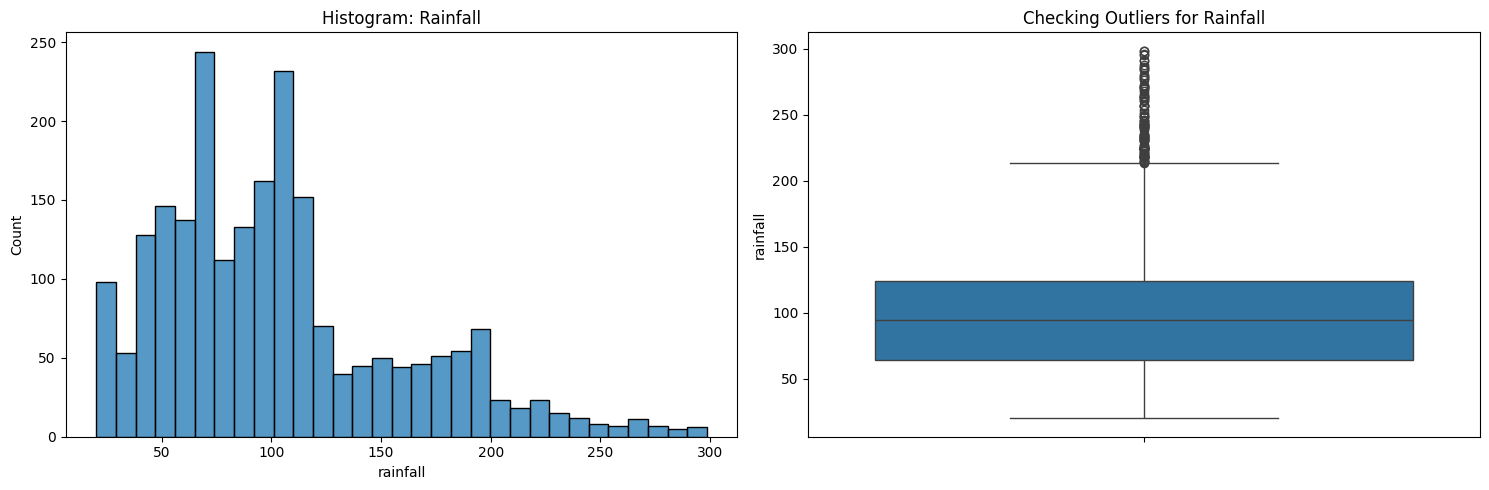

In [25]:
plot_conti(data['N'], "Nitrogen")
plot_conti(data['P'], "Phosphorous")
plot_conti(data['K'], "Potassium")
plot_conti(data['temperature'], "Temperature")
plot_conti(data['humidity'], "Humidity")
plot_conti(data['ph'], "PH")
plot_conti(data['rainfall'], "Rainfall")

In [26]:
# Some outliers are visible, let's detect them
# Function to detect outliers: IQR method (https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [27]:
for column in data.columns[:-1]:
    outliers = detect_outliers(data, column)
    print(f'Outliers in {column}:\n{outliers}\n')

Outliers in N:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []

Outliers in P:
       N    P    K  temperature   humidity        ph    rainfall   label
1200  24  130  195    29.996772  81.541566  6.112306   67.125345  grapes
1201  13  144  204    30.728040  82.426141  6.092242   68.381355  grapes
1204  24  131  196    22.032962  83.743728  5.732454   65.344408  grapes
1206  35  140  197    16.775573  82.752419  6.106191   66.762855  grapes
1209  17  134  204    39.040720  80.183933  6.499605   73.884670  grapes
...   ..  ...  ...          ...        ...       ...         ...     ...
1594  35  145  195    22.039115  94.580758  6.231950  110.980401   apple
1596  25  132  198    22.319441  90.851744  5.732758  100.117344   apple
1597  31  137  196    22.144641  93.825674  6.400321  120.631078   apple
1598  36  144  196    23.651676  94.505288  6.496934  115.361127   apple
1599  10  140  197    22.169395  90.271856  6.229499  124.468311   apple

[13

In [30]:
# handle outliers

def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median
    return df

In [31]:
for column in data.columns[:-1]:
    data_replaced = replace_outliers_with_median(data, column)

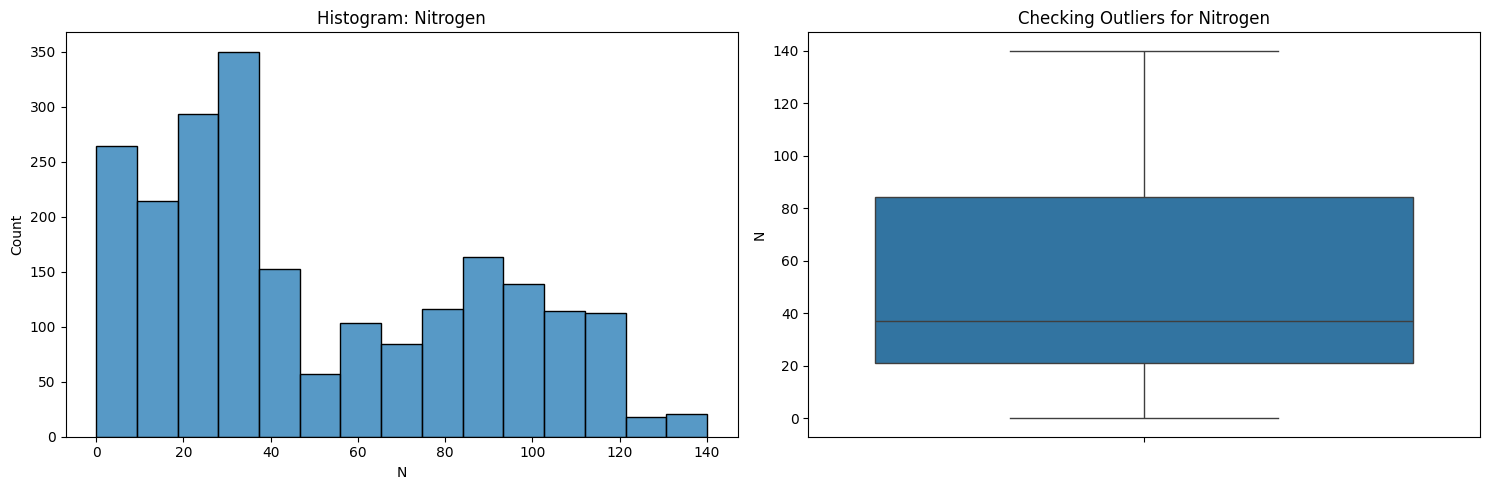

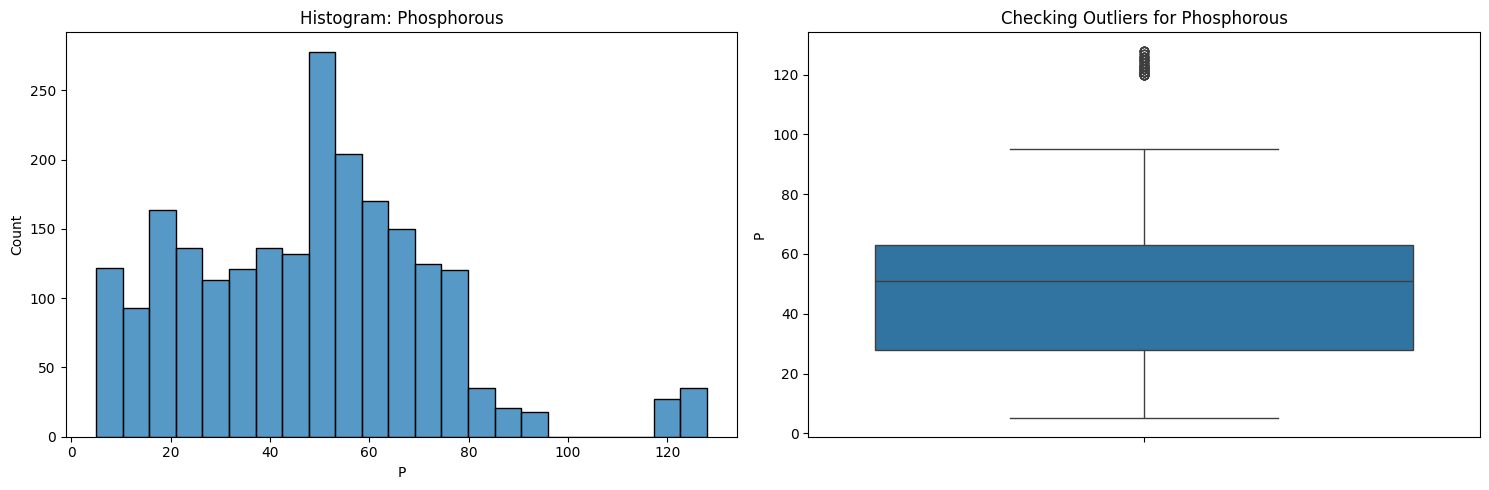

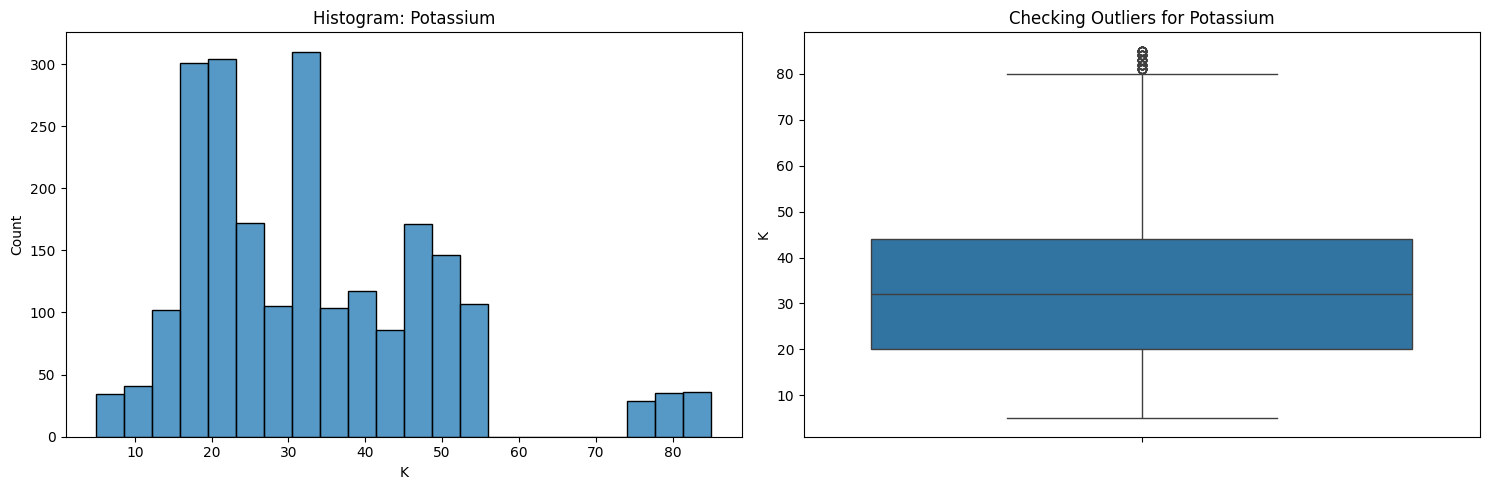

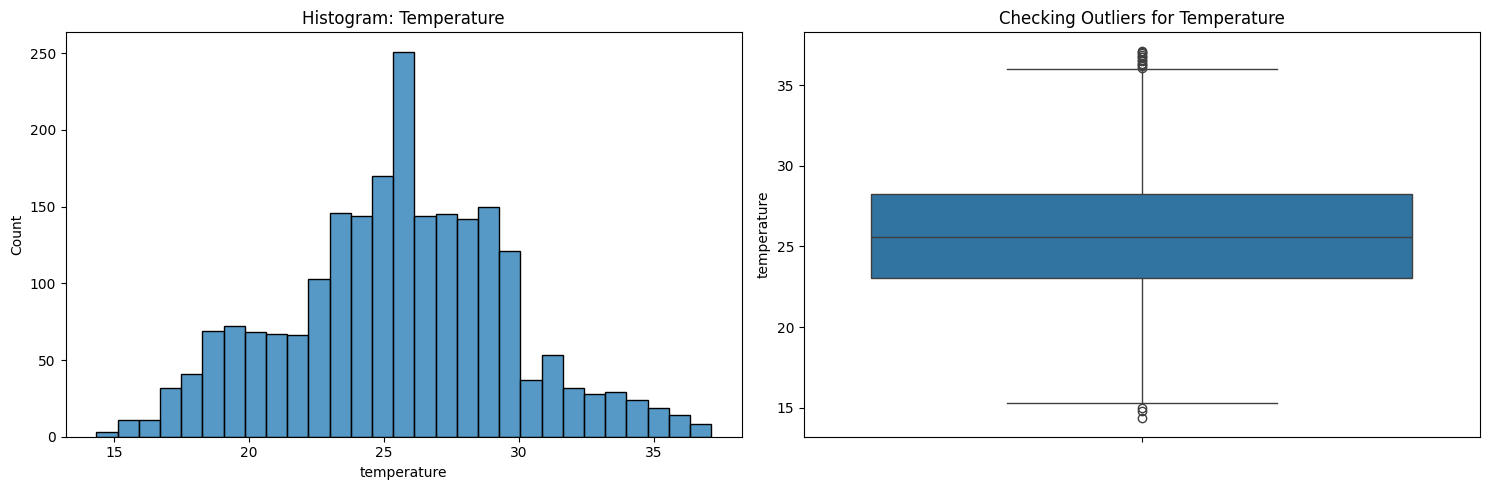

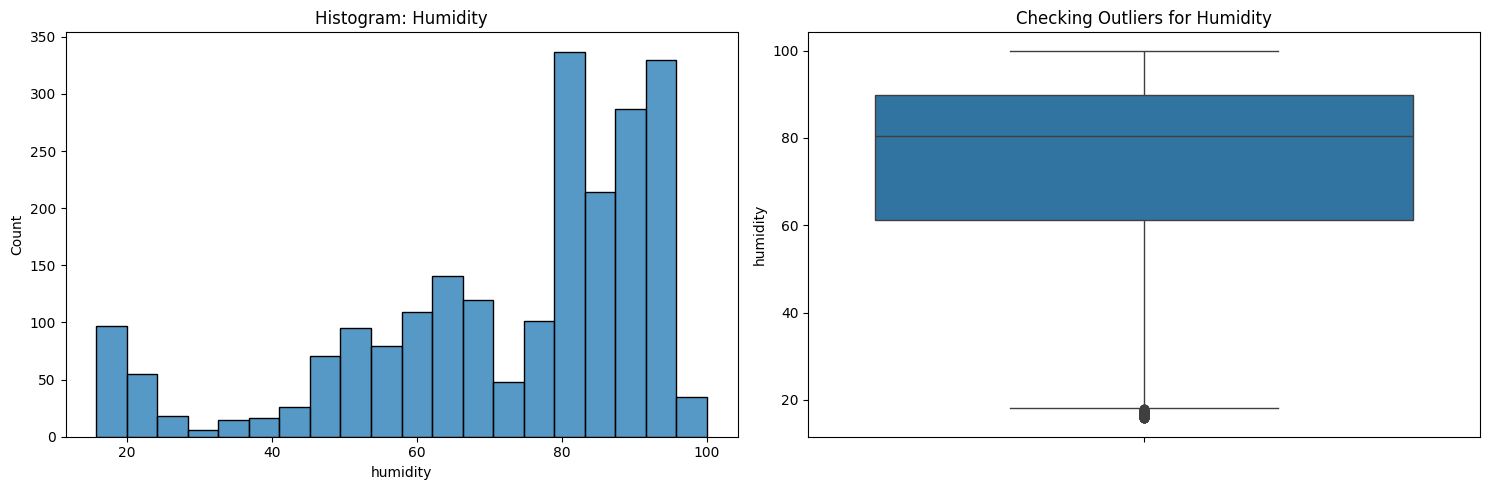

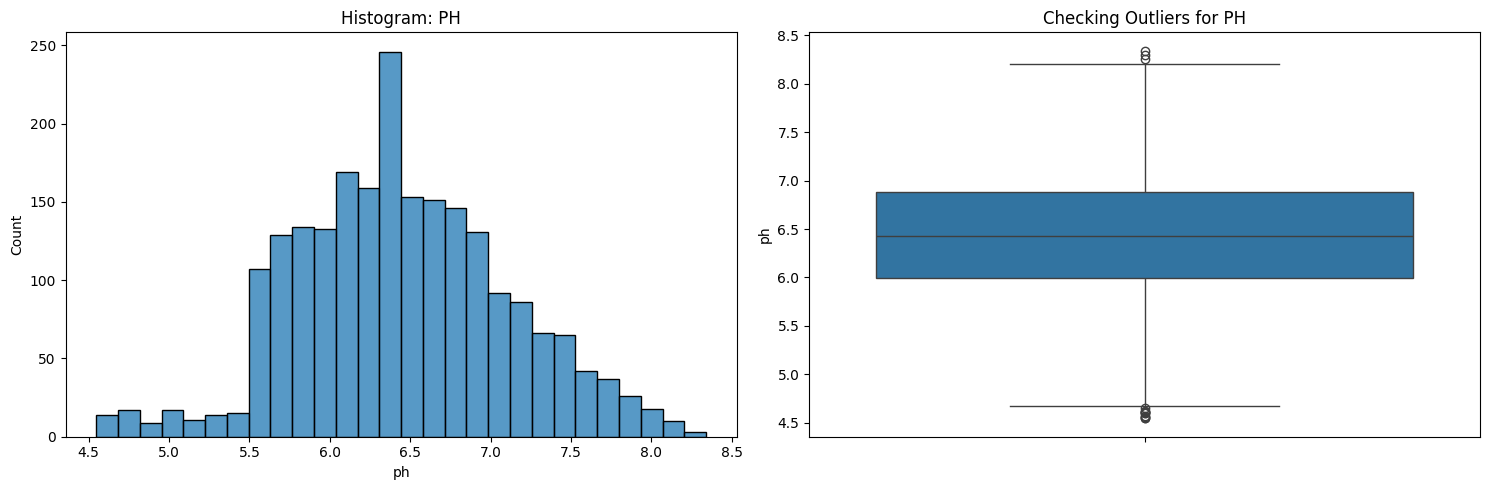

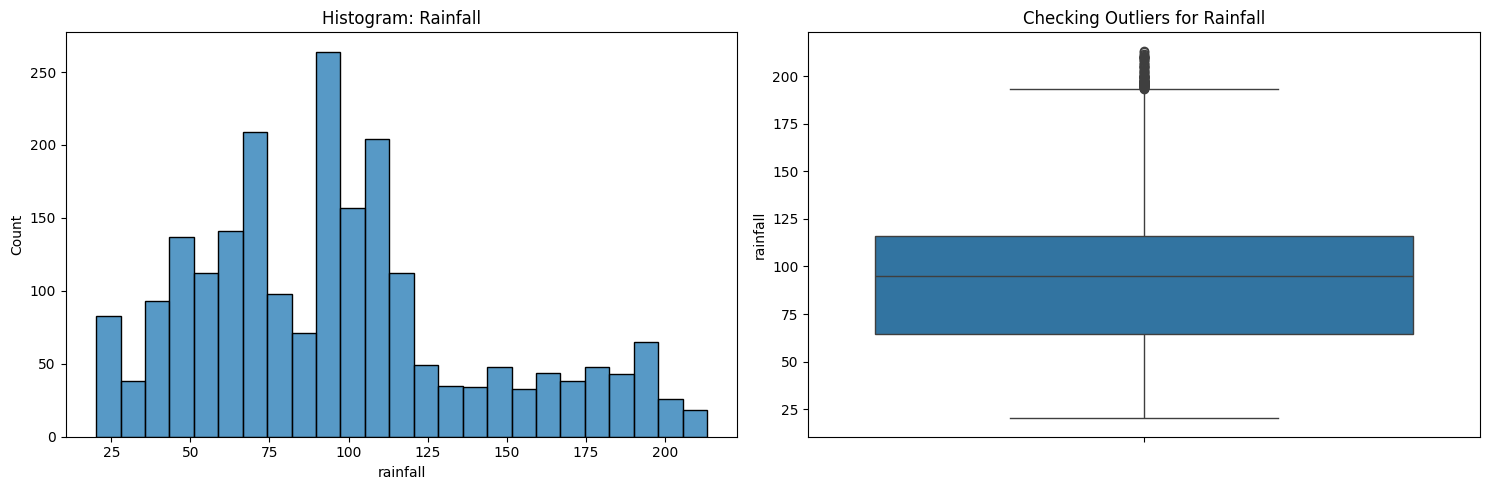

In [32]:
plot_conti(data['N'], "Nitrogen")
plot_conti(data['P'], "Phosphorous")
plot_conti(data['K'], "Potassium")
plot_conti(data['temperature'], "Temperature")
plot_conti(data['humidity'], "Humidity")
plot_conti(data['ph'], "PH")
plot_conti(data['rainfall'], "Rainfall")

### Model Training:


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [37]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
target = 'label'

X = data[features]
y = data[target]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

In [40]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [41]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    results[model_name] = {'accuracy': accuracy, 'report': report}
    print(f'{model_name}:\n Accuracy: {accuracy}\n')
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

c:\Users\Abdulmunim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
 Accuracy: 0.9477272727272728

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.83      0.86      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       0.95      1.00      0.97        18
        jute       0.64      0.86      0.73        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.94      0.97        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.92      0.88      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      

In [42]:
summary = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for model_name, result in results.items():
    summary['Model'].append(model_name)
    summary['Accuracy'].append(result['accuracy'])
    summary['Precision'].append(result['report']['weighted avg']['precision'])
    summary['Recall'].append(result['report']['weighted avg']['recall'])
    summary['F1-Score'].append(result['report']['weighted avg']['f1-score'])

summary_df = pd.DataFrame(summary)
print(summary_df)

                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.947727   0.951369  0.947727  0.947698
1           Decision Tree  0.984091   0.984564  0.984091  0.983949
2           Random Forest  0.993182   0.993664  0.993182  0.993178
3  Support Vector Machine  0.956818   0.966092  0.956818  0.955792
4       Gradient Boosting  0.986364   0.988018  0.986364  0.986522


In [44]:
# Save the best model and the label encoder

import joblib

best_model = models['Random Forest']
joblib.dump(best_model, 'model.jblb')

['model.jblb']

In [54]:
# get class mapping from label encoder
class_mapping = { v:k for k, v in dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))).items()}
print(class_mapping)

{0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


In [48]:
import numpy as np

In [55]:
def load_model(model_path):
    return joblib.load(model_path)

def predict(N, P, K, temperature, humidity, ph, rainfall, model):
    # Prepare the input data
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    predicted_class_index = best_model.predict(input_data)[0]
    class_mapping = {0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}
    crop = class_mapping[predicted_class_index]
    return crop


In [56]:
loaded_model = load_model('model.jblb')
print(predict(90, 42, 43, 20, 82, 6, 202, loaded_model))

rice


c:\Users\Abdulmunim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
